In [1]:
import numpy as np
import pandas as pd
from IPython.display import display 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Data = pd.read_csv('C:/Users/user/Desktop/WorkAssign/PreScreen_r3/ingredient1.csv')

In [2]:
Data.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


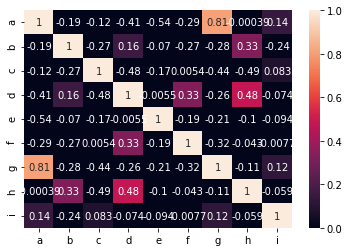

In [3]:
import seaborn as sns
sns.heatmap(Data.corr(), vmin=0, vmax=1, annot=True)

From the scatter plots and the heatmap of correlation, we can see that there is a strong correlation between the ‘a’ and ‘g’ features. The features ‘d’ and ‘h’ also show a good degree of correlation.

Feature 'c', 'e' and 'i' are selected as they have lower degree of correlation

In [4]:
Df = Data[["c","e","i"]]


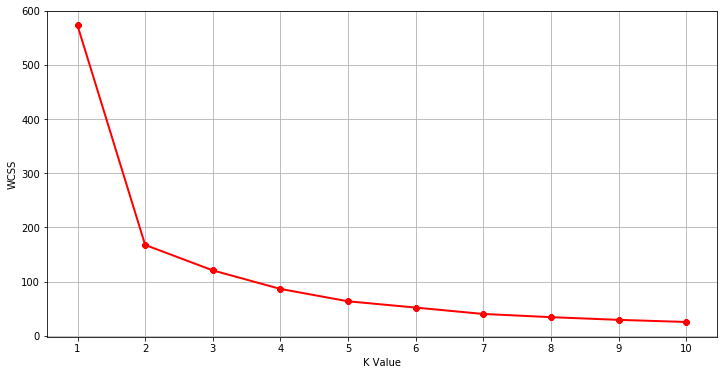

In [5]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(Df.iloc[:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

Calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS first starts to diminish. In the plot of WSS-versus k, this is visible as an elbow.

The optimal K value is found to be 2 using the elbow method.

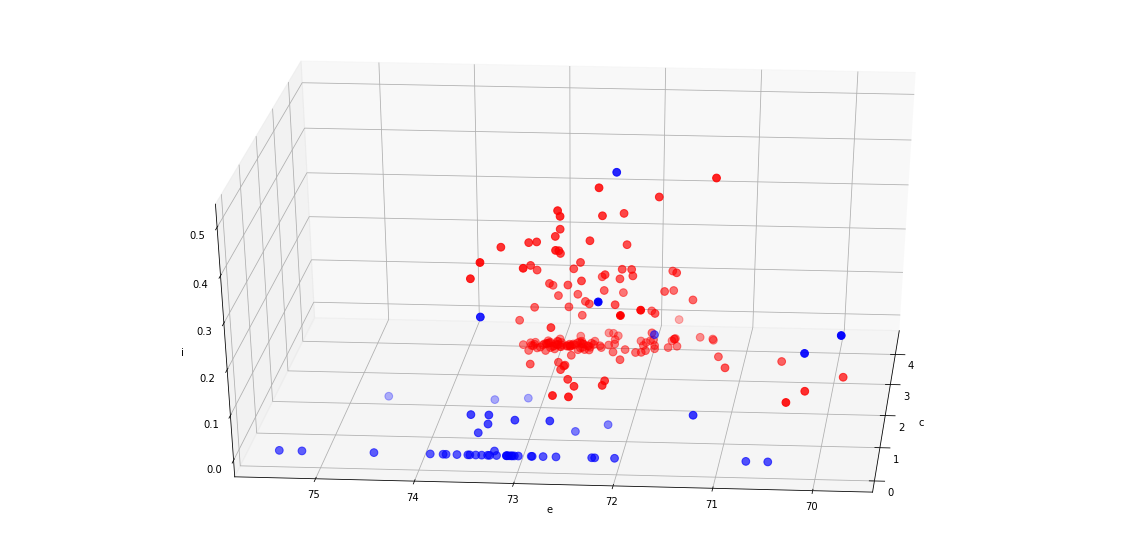

In [6]:
km = KMeans(n_clusters=2)
clusters = km.fit_predict(Df.iloc[:])
Data["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Data.c[Data.label == 0], Data.e[Data.label == 0],Data.i[Data.label == 0], c='blue', s=60)
ax.scatter(Data.c[Data.label == 1], Data.e[Data.label == 1],Data.i[Data.label == 1], c='red', s=60)


#ax.scatter(Data.c[Data.label == 2], Data.e[Data.label == 2],Data.i[Data.label == 2], c='green', s=60)
#ax.scatter(Data.c[Data.label == 3], Data.e[Data.label == 3],Data.i[Data.label == 3], c='yellow', s=60)
#ax.scatter(Data.a[Data.label == 3], Data.b[Data.label == 3], c='orange', s=60)
#ax.scatter(Data.a[Data.label == 0], Data.b[Data.label == 0], Data.d[Data.label == 0], c='blue', s=60)
#ax.scatter(Data.a[Data.label == 1], Data.b[Data.label == 1], Data.d[Data.label == 1], c='red', s=60)
#ax.scatter(Data.a[Data.label == 2], Data.b[Data.label == 2], Data.d[Data.label == 2], c='green', s=60)
#ax.scatter(Data.b[Data.label == 3], Data.k[Data.label == 3], Data.d[Data.label == 3], c='orange', s=60)
#ax.scatter(Data.b[Data.label == 4], Data.k[Data.label == 4], Data.d[Data.label == 4], c='purple', s=60)
#ax.scatter(Data.b[Data.label == 5], Data.k[Data.label == 5], Data.d[Data.label == 5], c='yellow', s=60)
ax.view_init(30, 185)
plt.xlabel("c")
plt.ylabel("e")
ax.set_zlabel('i')
plt.show()